In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import json
import util


In [15]:
dirname = 'data/raw_ser_des/'
size_map = dict()
exps_ser = dict()
exps_des = dict()

In [16]:
for filename in sorted(os.listdir(dirname)):
    with open(dirname + filename) as fp:
        data = json.load(fp)

    ds_name = util.get_ds_name(data)
    if ds_name == 'LOD':
        # Discard LOD
        continue

    exp_key = util.get_exp_name(data)

    kts = float(data['result']['size']) / (np.array(data['result']['times']) / 1_000_000)
    if 'ser' in filename:
        exps_ser[(ds_name, exp_key)] = kts
    else:
        exps_des[(ds_name, exp_key)] = kts
    size_map[ds_name] = data['result']['size']

dt_exp_ser = pd.DataFrame.from_dict(exps_ser)
dt_exp_des = pd.DataFrame.from_dict(exps_des)

In [17]:
def make_means(dt: pd.DataFrame):
    means = dt.iloc[5:].apply(np.mean, axis=0)
    means_dt = means.reset_index().set_axis(['dataset', 'algo', 'mean_kts'], axis=1, inplace=False)
    return means, means.unstack(), means_dt


ser_m_s, ser_m_u, ser_m_dt = make_means(dt_exp_ser)
des_m_s, des_m_u, des_m_dt = make_means(dt_exp_des)
# des_means = dt_exp_des.iloc[3:].apply(lambda s: np.mean(s) / 1_000_000, axis=0)

In [18]:
ser_m_u

,jelly_full,jelly_noprefix,jelly_noprefix_sm,jelly_norepeat,jena-proto,n3,rdf-xml,turtle
aemet-1,631.701021,865.959673,915.203626,472.447521,1139.284644,2447.454840,155.196625,153.369624
aemet-2,529.708726,749.016755,791.026946,402.535258,1208.883420,3222.038580,77.890200,140.615194
flickr_10m,515.776854,622.083078,663.290753,390.213068,960.982538,1830.916712,73.240709,212.830244
identica,584.372767,738.037235,724.738297,504.930393,1039.361882,998.100891,65.337021,156.384003
migr_reschange,556.698009,778.509533,815.987083,481.800482,807.791144,4270.316778,63.321952,138.786392
mix,581.460248,787.313242,754.705052,444.179947,938.335531,1692.794986,72.677056,150.327944
nevada_10m,466.064176,689.556060,648.595357,380.208856,1098.521777,3246.864421,15.656639,129.381793
petrol,562.160975,717.856062,702.568769,453.002946,1058.821446,3185.748037,71.233510,151.743422
tour_cap_nuts3,572.140815,797.742125,826.708228,470.516451,1096.372739,3956.501038,62.960039,136.853441
wikipedia,624.378321,783.090362,813.736886,549.466941,1252.356107,1792.141977,61.946424,188.741976


In [19]:
ser_m_u.apply(np.mean).apply(lambda x: np.round(x, 2))

jelly_full            562.45
jelly_noprefix        752.92
jelly_noprefix_sm     765.66
jelly_norepeat        454.93
jena-proto           1060.07
n3                   2664.29
rdf-xml                71.95
turtle                155.90
dtype: float64

In [20]:
des_m_u

,jelly_full,jelly_noprefix,jelly_noprefix_sm,jelly_norepeat,jena-proto,n3,rdf-xml,turtle
aemet-1,923.694332,989.018727,1010.346225,795.752345,524.553085,206.697030,123.418508,264.389909
aemet-2,867.302558,963.569473,937.068646,738.581425,515.971097,161.425874,80.914485,174.451330
flickr_10m,760.338175,850.083775,821.770709,631.223322,488.887099,136.910683,83.609810,179.761651
identica,1025.996423,1102.147594,1151.083404,884.705318,449.013849,145.045603,86.056382,158.426723
migr_reschange,842.024902,973.727672,980.115708,708.105445,529.973401,164.959841,71.435321,180.625823
mix,728.609199,774.068177,763.327545,684.661036,369.814639,124.082805,73.482021,113.203772
nevada_10m,772.149650,872.966707,793.090975,659.014644,519.468247,116.915833,66.614574,119.798952
petrol,214.335959,213.487904,215.963609,203.321754,213.435482,86.571857,38.393064,46.492844
tour_cap_nuts3,852.468891,966.918937,977.652757,737.739893,527.119787,165.269801,69.936759,183.909625
wikipedia,1216.555127,1193.940985,1177.123094,982.955468,512.131863,172.620678,98.435658,160.843248


In [21]:
des_m_u.apply(np.mean).apply(lambda x: np.round(x, 2))

jelly_full           820.35
jelly_noprefix       889.99
jelly_noprefix_sm    882.75
jelly_norepeat       702.61
jena-proto           465.04
n3                   148.05
rdf-xml               79.23
turtle               158.19
dtype: float64

In [22]:
ser_m_dt


,dataset,algo,mean_kts
0,identica,jelly_full,584.372767
1,identica,jelly_norepeat,504.930393
2,identica,jelly_noprefix,738.037235
3,identica,jelly_noprefix_sm,724.738297
4,identica,jena-proto,1039.361882
...,...,...,...
75,nevada_10m,jelly_noprefix_sm,648.595357
76,nevada_10m,jena-proto,1098.521777
77,nevada_10m,n3,3246.864421
78,nevada_10m,turtle,129.381793


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


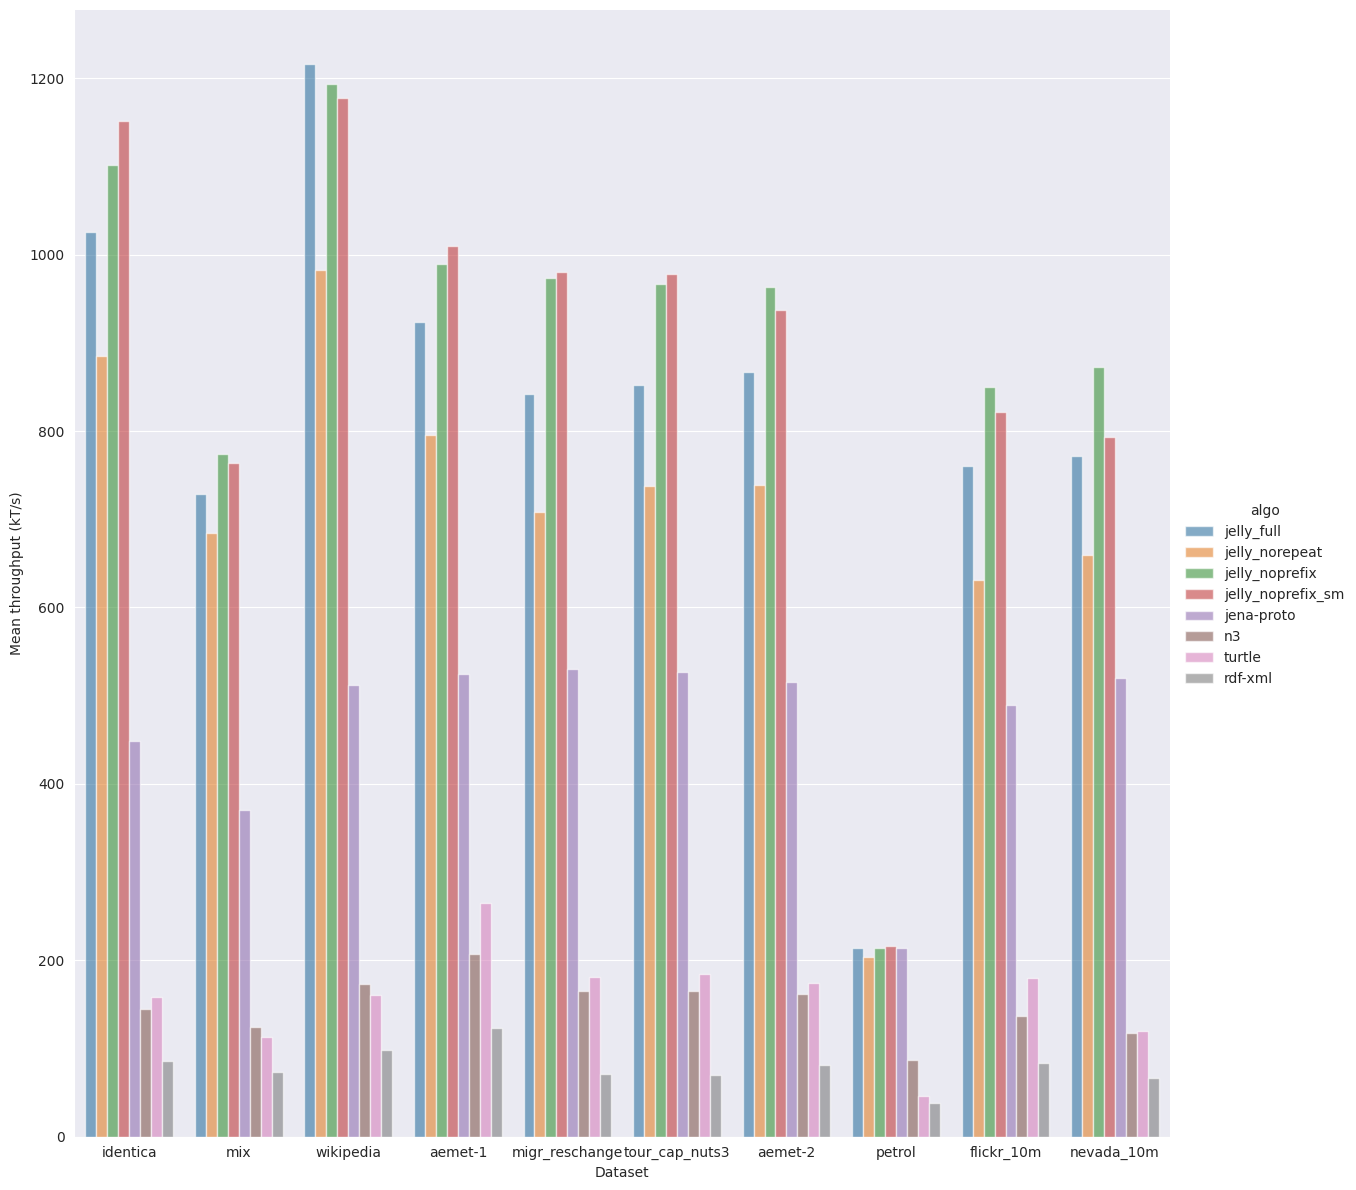

In [23]:
sns.catplot(
    data=des_m_dt, y='mean_kts', x='dataset', hue='algo', kind='bar',
    alpha=.6, height=12
)
plt.ylabel('Mean throughput (kT/s)')
plt.xlabel('Dataset')
plt.savefig('extra/img/raw_des.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


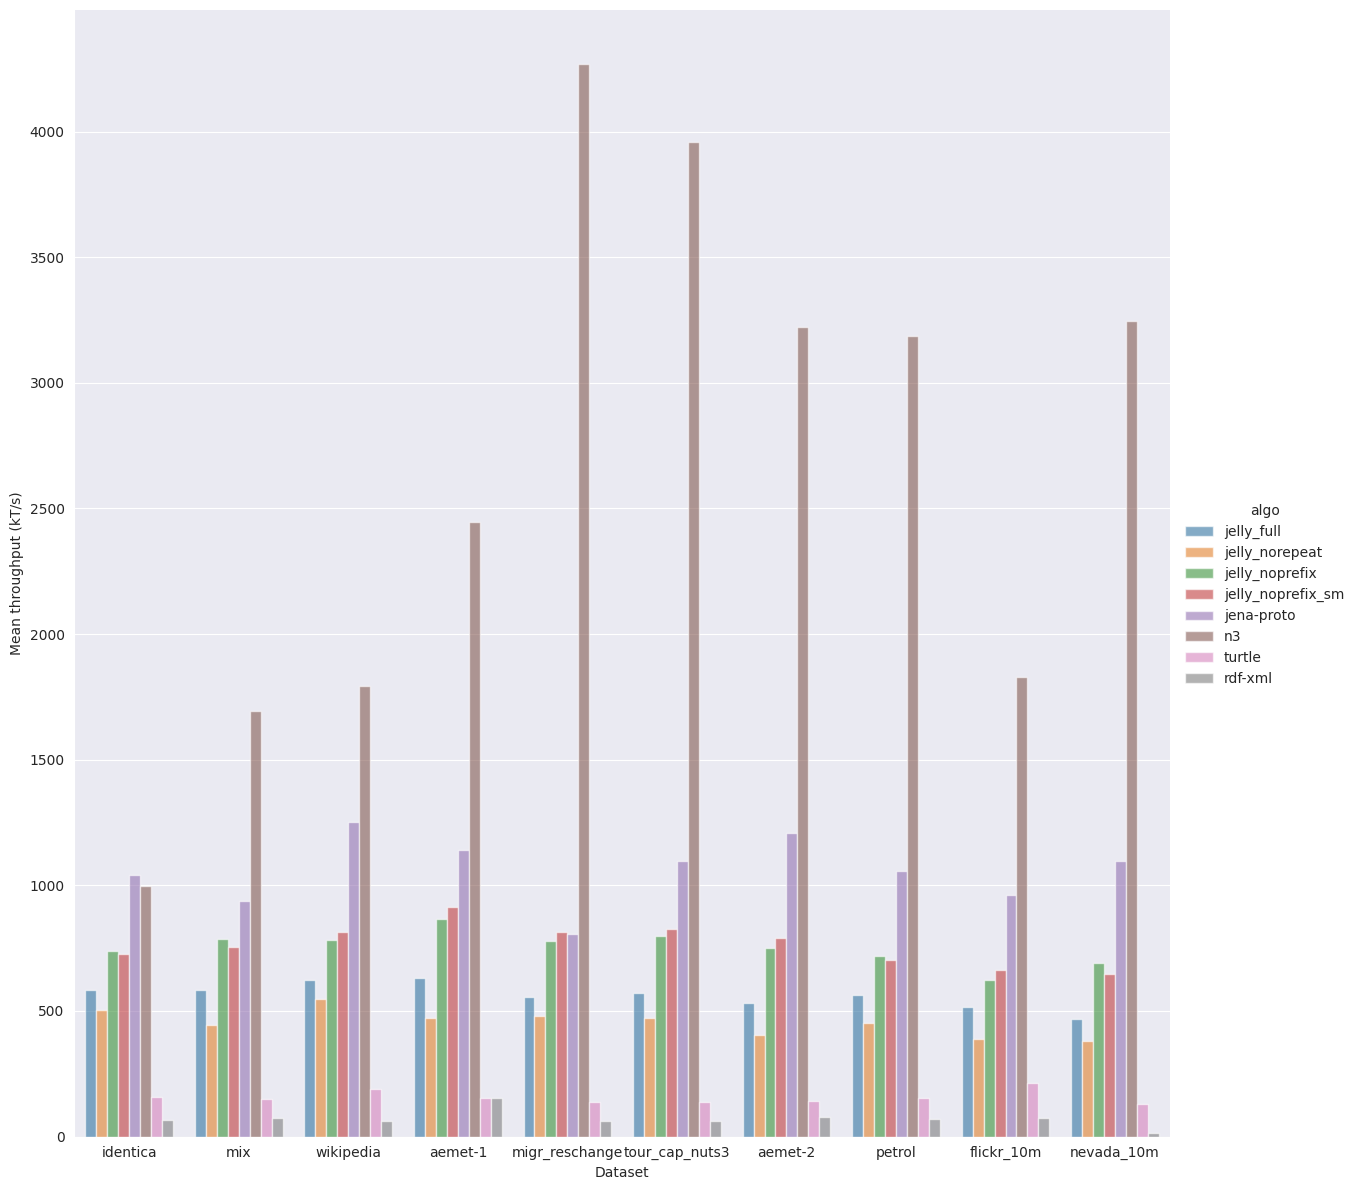

In [24]:
sns.catplot(
    data=ser_m_dt, y='mean_kts', x='dataset', hue='algo', kind='bar',
    alpha=.6, height=12
)
plt.ylabel('Mean throughput (kT/s)')
plt.xlabel('Dataset')
plt.savefig('extra/img/raw_ser.eps')

In [25]:
with open('data/sizes_grouped_1000.json', 'w') as fp:
    json.dump(size_map, fp)

In [26]:
ser_m_u.to_latex(
    'extra/latex/raw_ser.tex',
    float_format='%.2f',
    bold_rows=True,
    caption='Raw Serialization Throughput (kT/s)',
)
des_m_u.to_latex(
    'extra/latex/raw_des.tex',
    float_format='%.2f',
    bold_rows=True,
    caption='Raw Deserialization Throughput (kT/s)',
)

/tmp/ipykernel_222101/2698524354.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ser_m_u.to_latex(
/tmp/ipykernel_222101/2698524354.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  des_m_u.to_latex(
